# Supervised Learning – Regression and SVM
`jskyzero` `2018/03/26`

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## 线性回归

某班主任为了了解本班同学的数学和其他科目考试成绩间关系，在某次阶段性测试中，他在全班学生中随机
抽取 1 个容量为 5 的样本进行分析。该样本中 5 位同学的数学和其他科目成绩对应如下表：

| 学生编号    | 1    | 2    | 3    | 4    | 5    |
| ------- | ---- | ---- | ---- | ---- | ---- |
| 数学分数 m  | 89   | 91   | 93   | 95   | 97   |
| 物理分数 p  | 87   | 89   | 89   | 92   | 93   |
| 语文分数 c  | 72   | 76   | 74   | 71   | 76   |
| 英语分数 e  | 83   | 88   | 82   | 91   | 89   |
| 化学分数 ch | 90   | 93   | 91   | 89   | 94   |

利用以上数据，建立 m 与其他变量的多元线性回归方程，并回答下列问题：

1. 在线性回归中，利用梯度下降法，令参数向量𝜽0初始值全为𝟎，学习率α为 1，算出经过第一次迭代后的参数向量𝜽1；
2. 讨论（1）中所算出的𝜽1是否可以使线性回归中的代价函数𝐽(𝜽)下降，即𝐽(𝜽1) < 𝐽(𝜽0)；
3. 讨论是否可以选取更佳的学习率α，经过第一次迭代后，使代价函数𝐽(𝜽)下降得更快；
4. 利用标准方程求出最优的多元线性回归方程（系数精确到 0.01），并预测该班物理分数 88、语文分数 73、英语分数 87、化学分数 92 同学的数学分数。
5. 在 L2 正则化线性回归中，令正则化平衡系数λ为 1，利用标准方程求出最优的 L2 正则化多元线性回归方程（系数精确到 0.01），并比较其与（4）中得出的多元线性回归方程对数学分数的预测，哪个更好。

In [7]:
# import data
m = [89, 91, 93, 95, 97]
p = [87, 89, 89, 92, 93]
c = [72, 76, 74, 71, 76]
e = [83, 88, 82, 91, 89]
ch = [90, 93, 91, 89, 94]
data = [m, p, c, e, ch]
# initial theta
theta = list(map(lambda x: 1, range(0, 5)))

data[0][2]

93

## 逻辑回归
研究人员对使用雌激素与子宫内膜癌发病间的关系进行了 1:1 配对的病例对照研究。病例与对照按年龄相近、婚姻状况相同、生活的社区相同进行了配对。收集了年龄、雌激素药使用、胆囊病史、高血压和非雌激素药
使用的数据。变量定义及具体数据如下：

match：配比组

case：case=1 病例；case=0 对照（未发病）

est：est=1 使用过雌激素；est=0 未使用雌激素；

gall：gall=1 有胆囊病史；gall=0 无胆囊病史；

hyper：hyper=1 有高血压；hyper=0 无高血压；

nonest：nonest=1 使用过非雌激素；nonest=0 未使用过非雌激素；

Problem Set #1


| Match | Case | Est  | Gall | Hyper | Nonest |
| ----- | ---- | ---- | ---- | ----- | ------ |
|1 | 1 | 1 | 1 | 0 | 1|
|1 | 0 | 0 | 1 | 0 | 0|
|2 | 1 | 1 | 0 | 1 | 1|
|2 | 0 | 0 | 0 | 0 | 1|
|3 | 1 | 1 | 1 | 0 | 1|
|3 | 0 | 1 | 0 | 1 | 1|
|4 | 1 | 1 | 0 | 0 | 0|
|4 | 0 | 1 | 0 | 1 | 1|
|5 | 1 | 1 | 0 | 1 | 1|
|5 | 0 | 0 | 0 | 0 | 0|
|6 | 1 | 1 | 1 | 0 | 1|
|6 | 0 | 0 | 0 | 0 | 0|
|7 | 1 | 1 | 0 | 0 | 1|
|7 | 0 | 0 | 0 | 0 | 0|
|8 | 1 | 1 | 1 | 1 | 1|
|8 | 0 | 0 | 0 | 1 | 1|
|9 | 1 | 1 | 0 | 0 | 1|
|9 | 0 | 1 | 0 | 0 | 1|
|10 | 1 | 0 | 0 | 0 | 1|
|10 | 0 | 0 | 0 | 0 | 1|
|11 | 1 | 1 | 0 | 1 | 1|
|11 | 0 | 1 | 0 | 1 | 1|
|12 | 1 | 0 | 0 | 0 | 1|
|12 | 0 | 0 | 0 | 1 | 1|
|13 | 1 | 1 | 0 | 1 | 1|
|13 | 0 | 0 | 0 | 0 | 0|
|14 | 1 | 1 | 0 | 0 | 1|
|14 | 0 | 0 | 0 | 0 | 0|
|15 | 1 | 1 | 0 | 1 | 1|
|15 | 0 | 1 | 0 | 0 | 1|
|16 | 1 | 1 | 0 | 0 | 1|
|16 | 0 | 1 | 0 | 1 | 1|
|17 | 1 | 1 | 0 | 0 | 1|
|17 | 0 | 0 | 0 | 0 | 0|
|18 | 1 | 0 | 1 | 0 | 1|
|18 | 0 | 0 | 0 | 1 | 0|
|19 | 1 | 1 | 1 | 0 | 1|
|19 | 0 | 1 | 1 | 0 | 0|
|20 | 1 | 1 | 0 | 0 | 0|
|20 | 0 | 1 | 0 | 1 | 1|

1. 调用逻辑回归函数或实现求解 L2 逻辑回归分析的梯度下降算法，求出最优的逻辑回归模型；
2. 尝试找出对影响子宫内膜癌发病的最直接的因素；
3. 编程实现求解 L2 正则化逻辑回归分析的梯度下降算法，并求出正则化平衡系数λ为 1 时的最优正则化逻辑回归模型（加分题）。

## 支持向量机
考虑以下的两类训练样本集

| 特征 1 | 特征 2 | 类标   |
| ---- | ---- | ---- |
| 1    | 1    | +    |
| 2    | 2    | +    |
| 2    | 0    | +    |
| 0    | 0    | -    |
| 1    | 0    | -    |
| 0    | 1    | -    |

1.  在图中画出这 6 个训练样本点和支持向量机对应的最优超平面（决策边界），并写出对应的超平面方程；
2.  假设增加一些训练样本点，这些点能被正确分类且远离最优超平面（决策边界），说明最优超平面（决策边界）不受新增训练样本点影响，而线性回归会受影响的原因；
3.  指出哪些是支持向量，并求出两个异类支持向量到最优超平面（决策边界）的距离之和；
4.  通过寻找拉格朗日待定乘数αi来构造对偶空间的解，并将其与（1）中结果作比较。

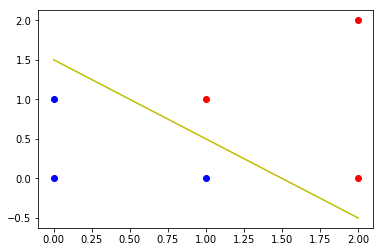

In [16]:
feature_1 = [1, 2, 2, 0, 1, 0]
feature_2 = [1, 2, 0, 0, 0, 1]
label = [1, 1, 1, -1, -1, -1]

super_space_function = lambda x : 1.5 - x
x = np.linspace(min(feature_1), max(feature_1), 1000)
y = np.vectorize(super_space_function)(x)
plt.plot(x, y, color='y', label="super_space_function")


for i in range(0, len(label)):
    color = 'r' if label[i] == 1 else 'b' 
    plt.plot(feature_1[i], feature_2[i], 'ro', color=color)

1. 画出这 6 个训练样本点和支持向量机对应的最优超平面如上图，对应的超平面方程是 $y + x - 1.5 = 0$
2. 因为SVM中影响超平面的主要是距离超平面最近的那些“支持向量”，已知训练样本是能正确分类但是原理最优超平面的话，这些训练样本就并不会影响到最优超平面，而所有样本都是会影响到线性回归的预测函数，故会影响到线性回归。
3. 如图，(1,1) (2, 0) (1, 0) (0,1) 是离超平面最近的向量（支持向量），选取(0, 1) (1, 1)两个点，求得距离为$\frac{\sqrt{2}}{2}$
4. 求解过程如下：